In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config('spark.driver.maxResultSize', '18g').getOrCreate()

In [3]:
pip install -U seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/Users/zhanglixiang/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = spark.read.load("dbfs:/mnt/lsde/group05/statistics/new-posts-posters.parquet",format="parquet")

In [5]:
df.show()

+---------+-------------+-----------+
|     date|count_posters|count_posts|
+---------+-------------+-----------+
|2021-1101|          854|       1162|
|2021-1102|         1119|       1319|
|2021-1103|         1128|       1616|
|2021-1104|         1544|       1872|
|2021-1105|         1582|       1834|
|2021-1106|         1456|       1640|
|2021-1107|         1374|       1702|
|2021-1108|         2412|       2869|
|2021-1109|         1330|       1688|
|2021-1110|         1171|       1306|
|2021-1111|         1576|       1813|
|2021-1112|         1895|       2283|
|2021-1113|         1764|       2043|
|2021-1114|         2592|       2998|
|2021-1115|         1553|       1718|
|2021-1116|         2010|       2247|
|2021-1117|         2471|       2721|
|2021-1118|         1690|       2053|
|2021-1119|         1971|       2359|
|2021-1120|         2055|       2423|
+---------+-------------+-----------+
only showing top 20 rows



In [6]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [7]:
from pyspark.sql import functions as sf

In [8]:
df =df.orderBy('date',ascending=True)

In [9]:
df_sum=df.groupBy('date').agg(sf.sum('count_posters').alias('sum_posters'),sf.sum('count_posts').alias('sum_posts'))

In [10]:
df_sum =df_sum.orderBy('date')
df_sum.show()

+---------+-----------+---------+
|     date|sum_posters|sum_posts|
+---------+-----------+---------+
|2014-0201|        349|      367|
|2014-0202|        430|      448|
|2014-0203|       1001|     1036|
|2014-0204|       1058|     1116|
|2014-0205|       1164|     1243|
|2014-0206|        635|      673|
|2014-0207|       1218|     1293|
|2014-0208|       1045|     1141|
|2014-0209|        663|      714|
|2014-0210|        848|      908|
|2014-0211|        934|      990|
|2014-0212|        595|      632|
|2014-0213|        561|      603|
|2014-0214|        800|      836|
|2014-0215|        797|      903|
|2014-0216|        599|      641|
|2014-0217|        508|      549|
|2014-0218|        696|      811|
|2014-0219|       1378|     1556|
|2014-0220|       2141|     2759|
+---------+-----------+---------+
only showing top 20 rows



In [11]:

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
data=df_sum.toPandas()

In [13]:
import pandas as pd 
import numpy as np

In [14]:
def handledate(date):
    return date[0:7]+"-"+date[-2:]

In [15]:
data['newdate'] = data['date'].apply(handledate)

In [16]:
newdata =data[['sum_posters','sum_posts','newdate']]

In [17]:
newdata['date'] = pd.to_datetime(newdata['newdate'])
newdata.set_index("date", inplace=True)

In [18]:
newdata

,sum_posters,sum_posts,newdate
date,,,
2014-02-01,349,367,2014-02-01
2014-02-02,430,448,2014-02-02
2014-02-03,1001,1036,2014-02-03
2014-02-04,1058,1116,2014-02-04
2014-02-05,1164,1243,2014-02-05
...,...,...,...
2022-08-27,5268,7555,2022-08-27
2022-08-28,5401,7714,2022-08-28
2022-08-29,5747,8263,2022-08-29


In [19]:
poster_df=newdata[['sum_posters']]

In [20]:
poster_df.head()

,sum_posters
date,
2014-02-01,349
2014-02-02,430
2014-02-03,1001
2014-02-04,1058
2014-02-05,1164


In [21]:
posts_df=newdata[['sum_posts']]

In [22]:
posts_df.head()

,sum_posts
date,
2014-02-01,367
2014-02-02,448
2014-02-03,1036
2014-02-04,1116
2014-02-05,1243


In [23]:
posts_df = posts_df.reset_index()

In [24]:
posts_df.head()

,date,sum_posts
0,2014-02-01,367
1,2014-02-02,448
2,2014-02-03,1036
3,2014-02-04,1116
4,2014-02-05,1243


In [25]:
poster_df = poster_df.reset_index()

In [26]:
poster_df.head()

,date,sum_posters
0,2014-02-01,349
1,2014-02-02,430
2,2014-02-03,1001
3,2014-02-04,1058
4,2014-02-05,1164


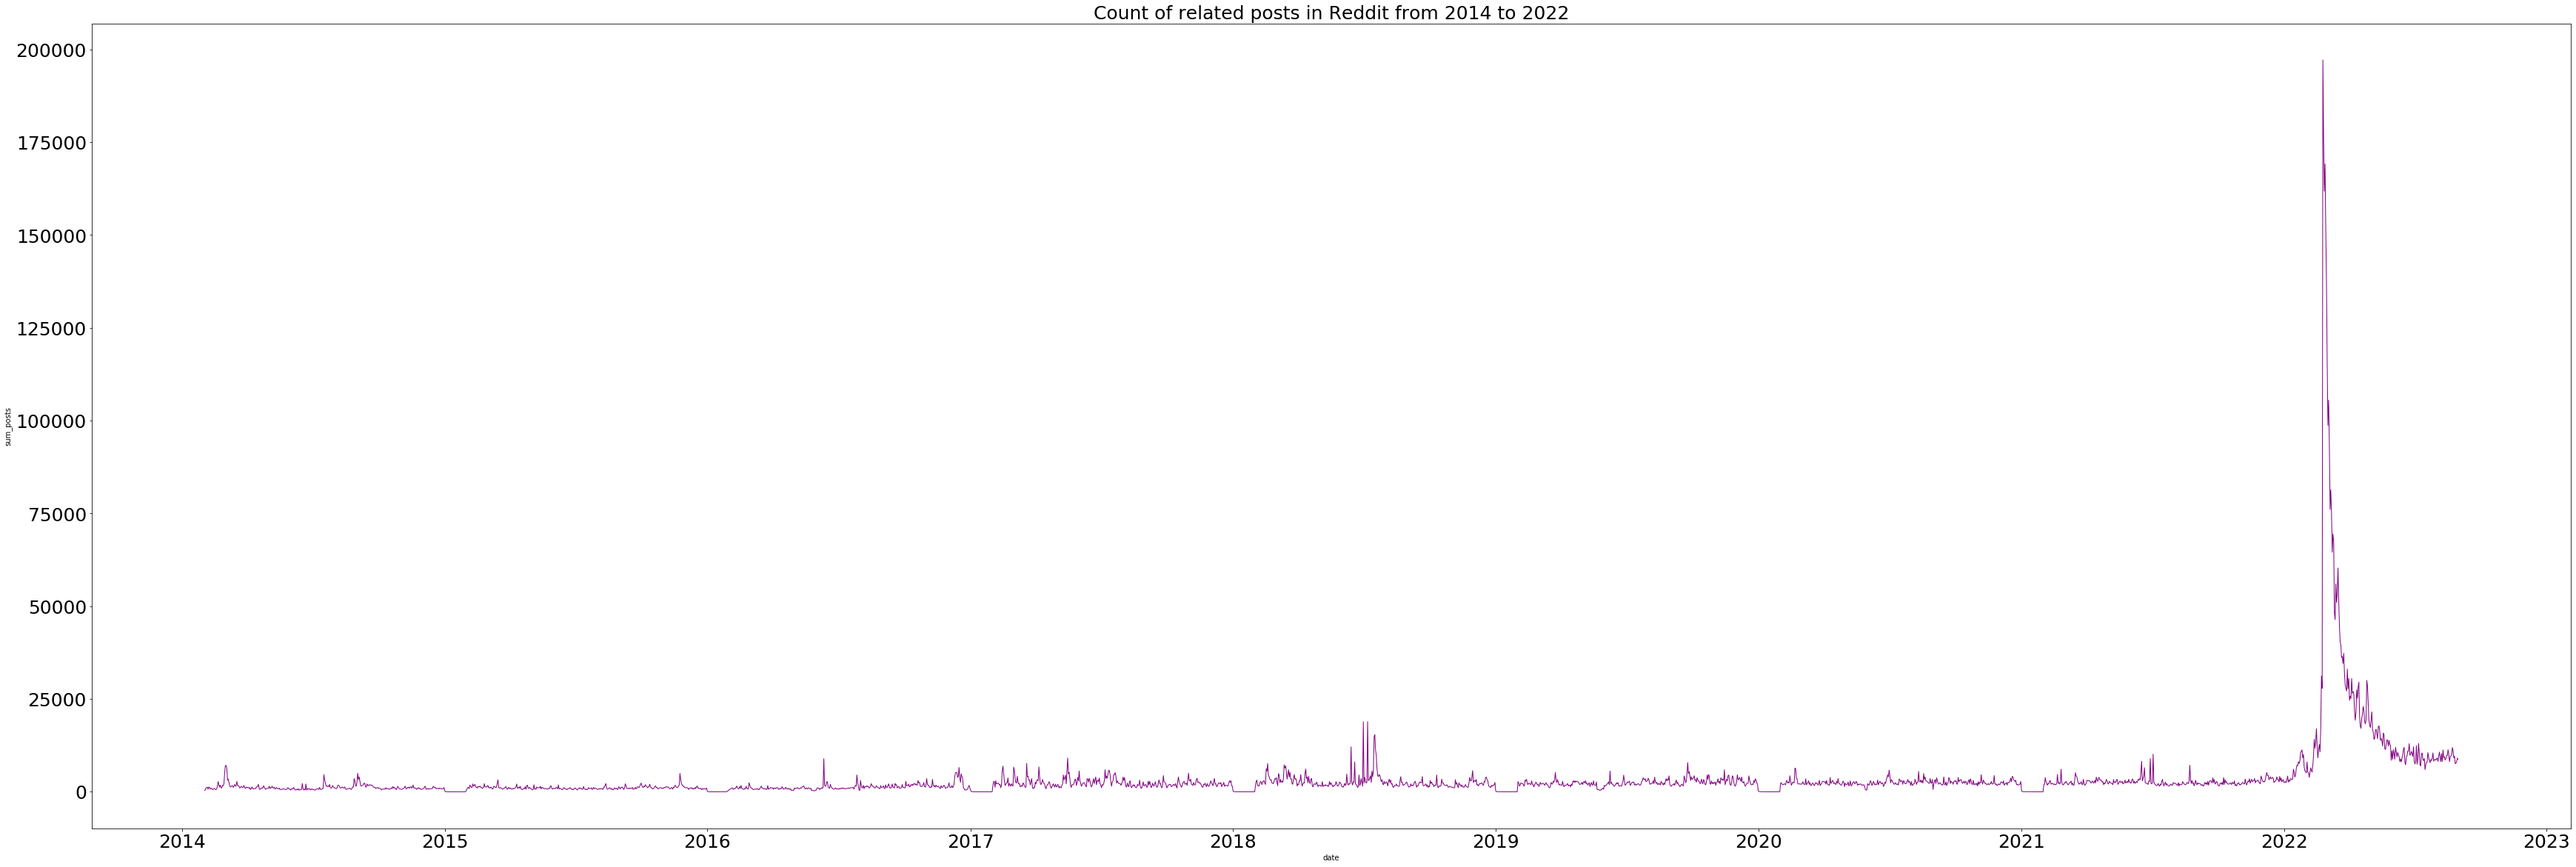

<Figure size 432x288 with 0 Axes>

In [40]:
fig=plt.figure(figsize=(60,20))
sns.lineplot(x='date',y='sum_posts',data=posts_df, linewidth=1, color='purple').set(title='Count of related posts in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
#plt.xticks(font=20)
plt.xticks(size=25)
plt.yticks(size =25)
plt.title( 'Count of related posts in Reddit from 2014 to 2022',fontsize=25)
#sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()
plt.savefig('posts-count.png', dpi=400, transparent=True)

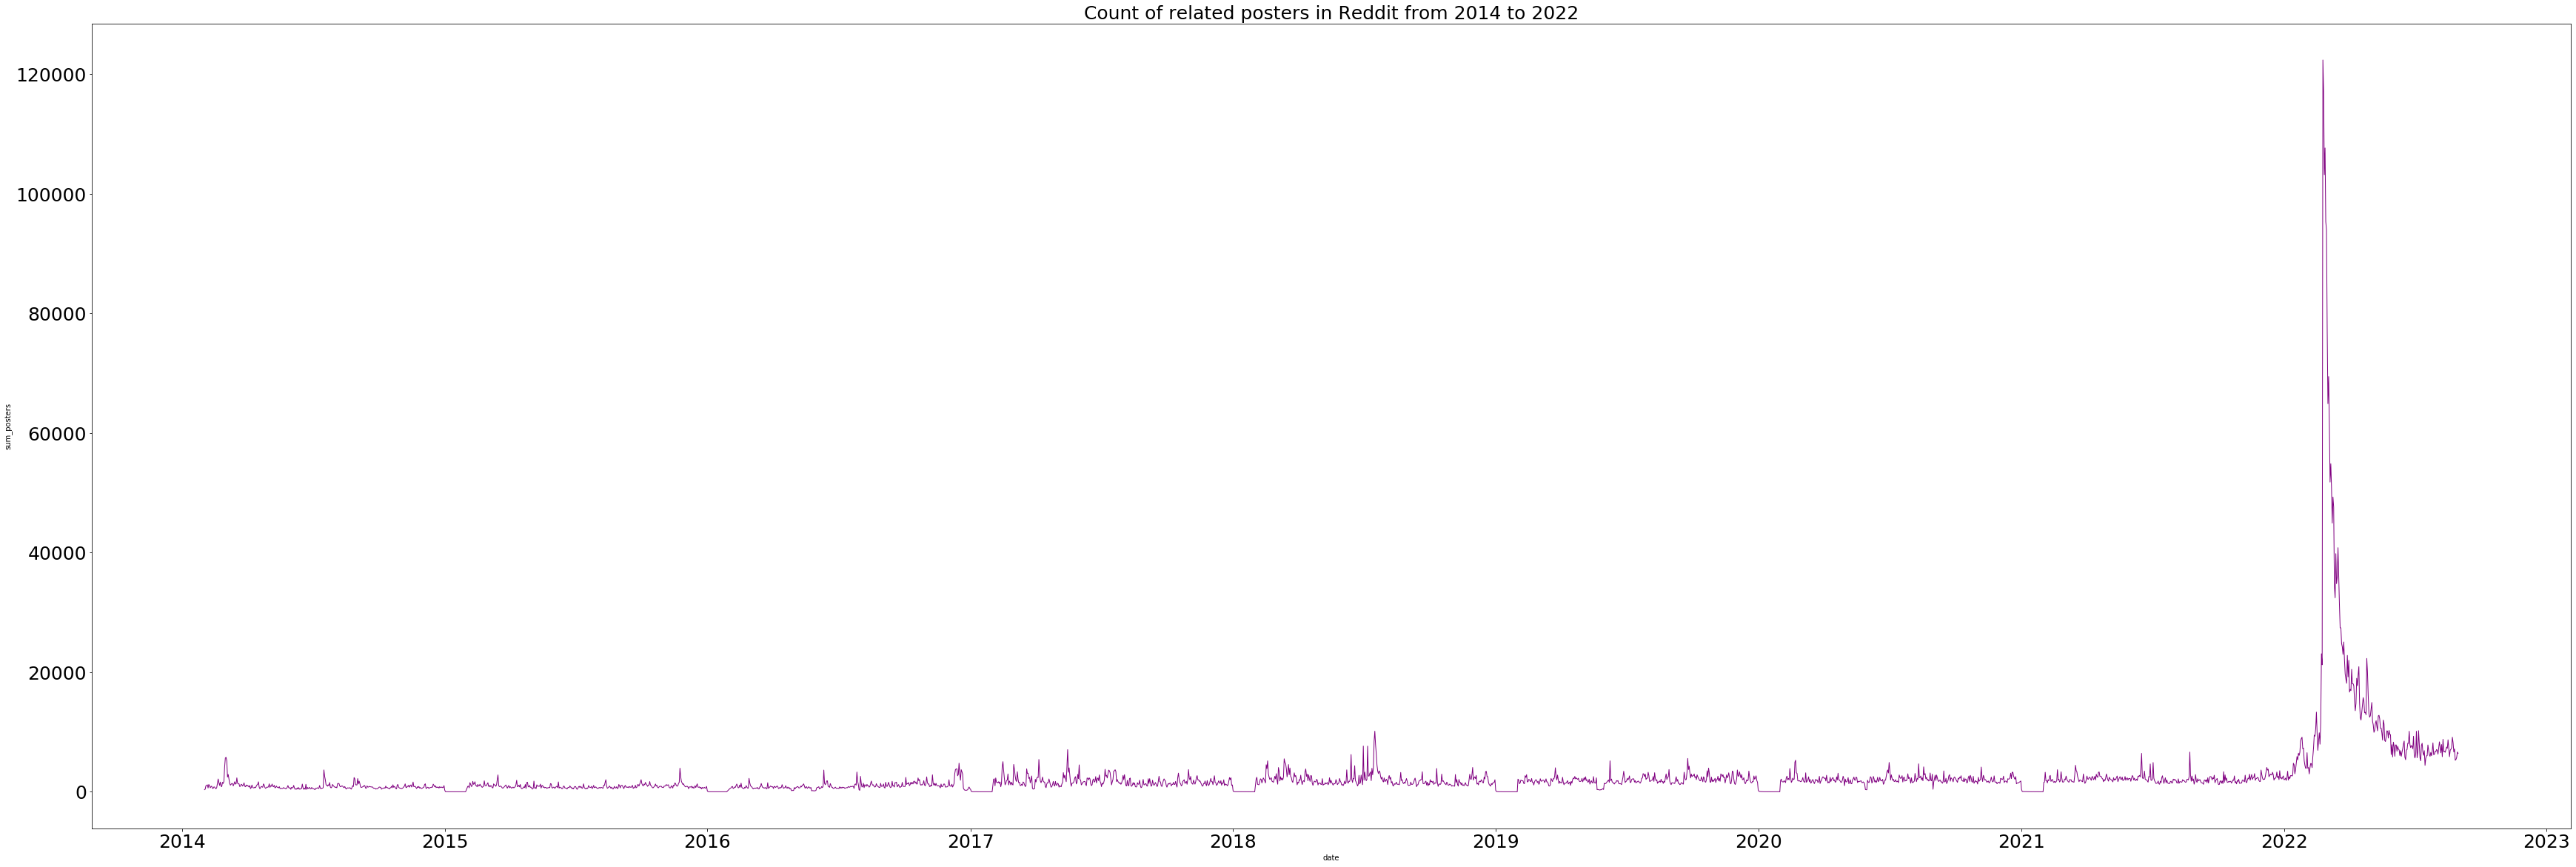

<Figure size 432x288 with 0 Axes>

In [41]:
fig=plt.figure(figsize=(60,20))
sns.lineplot(x='date',y='sum_posters',data=poster_df, linewidth=1, color='purple').set(title='Count of related posters in Reddit from 2014 to 2022')
# 设置x轴文字倾斜
#plt.xticks(rotation=15)
#plt.xticks([])
#plt.yticks([])
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.xticks(size=25)
plt.yticks(size =25)
plt.title( 'Count of related posters in Reddit from 2014 to 2022',fontsize=25)
plt.show()
plt.savefig('posters-count.png', dpi=400, transparent=True)